<h1 align="center"><font size = 14>Hands-On Machine Learning</font></h1>
<h3 align="center"><font size = 7>Regularization</font></h3>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# Step1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import RidgeCV

from sklearn.linear_model import Lasso

from sklearn.linear_model import LassoCV

from sklearn.linear_model import ElasticNetCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Step2: Read Data

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
df = pd.read_csv('Boston_house_price.csv', delimiter="\s+", names=column_names)

# Step3: Data Overview

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Step4: Determine X, y

In [19]:
X = df.drop('Price', axis=1)
y = df['Price']

In [21]:
X.shape

(506, 13)

In [23]:
y.shape

(506,)

# Step6: Poly Regression

## Poly Features

In [25]:
poly_conv=PolynomialFeatures(degree=3, include_bias=False)
poly_feature = poly_conv.fit_transform(X)

## Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)

In [29]:
X_train.shape, X_test.shape

((354, 559), (152, 559))

## Standard Scaler

In [31]:
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [35]:
X_train = scaler.transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

## Creat Model

In [39]:
Poly = LinearRegression()

In [41]:
Poly.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = Poly.predict(X_test)

In [47]:
# y_pred

In [49]:
mae_poly = mean_absolute_error(y_test, y_pred)

mae_poly

35.59530186300975

# Step8: Regularization

## 1- Ridge Regression

In [51]:
ridge_model = Ridge(alpha=40)

In [53]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=40)

In [57]:
y_pred_r = ridge_model.predict(X_test)

In [59]:
mae_ridge = mean_absolute_error(y_test, y_pred_r)

mae_ridge

2.7914826456230255

## Ridge Regression (Choosing an alpha value with Cross-Validation)

In [62]:
ridge_cv = RidgeCV(alphas=(0.1, 1, 10, 40), cv=5)

In [64]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1, 10, 40), cv=5)

In [66]:
y_pred_rcv = ridge_cv.predict(X_test)

In [68]:
mae_ridge_cv = mean_absolute_error(y_test, y_pred_rcv)

mae_ridge_cv

2.637078582804372

In [84]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1, 10, 40),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [86]:
ridge_cv.best_score_

0.8514833730207985

In [90]:
list_ridge = ridge_cv.coef_

def none_zero(list):
    count = 0
    
    for i in list:
        if i!=0:
            count+=1
    print(count)
none_zero(list_ridge)

559


# 2- Lasso Regression

In [92]:
Lasso_model = Lasso(alpha=10)
Lasso_model.fit(X_train, y_train)
y_pred_lasso = Lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

mae_lasso

7.464072256913471

In [94]:
Lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=5)
Lasso_cv.fit(X_train, y_train)
y_pred_lasso_cv = Lasso_cv.predict(X_test)
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
print(f"Lasso Regression with CV MAE: {mae_lasso_cv}")

Lasso Regression with CV MAE: 2.89725913967492


In [96]:
list_lasso = Lasso_cv.coef_

none_zero(list_lasso)

35


In [98]:
559-35

524

## Lasso Regression (Coosing an alpha value with Cross-Validation)

# 3- Elastic Net

In [100]:
Elastic = ElasticNetCV(l1_ratio=[0.1, 0.5], cv=5, max_iter=100)
Elastic.fit(X_train, y_train)
y_pred_e = Elastic.predict(X_test)
mae_elastic = mean_absolute_error(y_test, y_pred_e)
print(f"Elastic Net MAE: {mae_elastic}")

Elastic Net MAE: 2.6434025184740313


In [102]:
list_E = Elastic.coef_

none_zero(list_E)

320


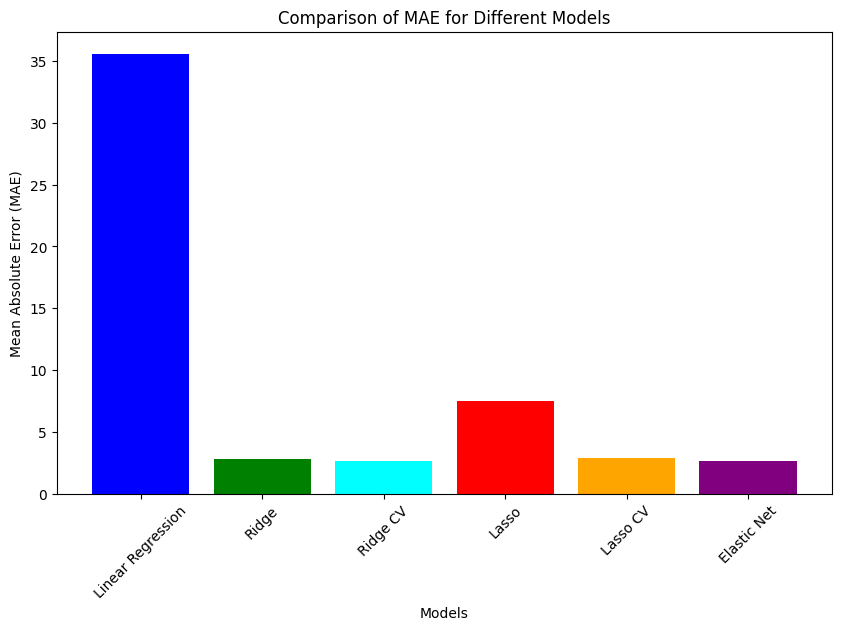

In [104]:
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Ridge', 'Ridge CV', 'Lasso', 'Lasso CV', 'Elastic Net']
mae_values = [mae_poly, mae_ridge, mae_ridge_cv, mae_lasso, mae_lasso_cv, mae_elastic]
plt.bar(models, mae_values, color=['blue', 'green', 'cyan', 'red', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Different Models')
plt.xticks(rotation=45)
plt.show()

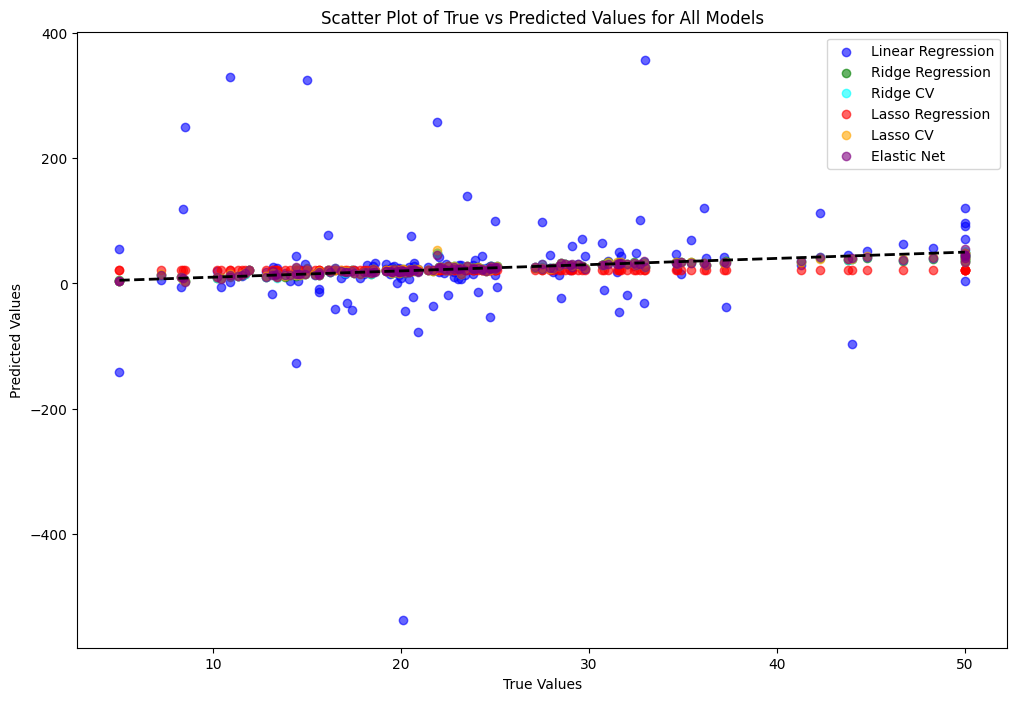

In [106]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, label='Linear Regression', alpha=0.6, color='blue')
plt.scatter(y_test, y_pred_r, label='Ridge Regression', alpha=0.6, color='green')
plt.scatter(y_test, y_pred_rcv, label='Ridge CV', alpha=0.6, color='cyan')
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.6, color='red')
plt.scatter(y_test, y_pred_lasso_cv, label='Lasso CV', alpha=0.6, color='orange')
plt.scatter(y_test, y_pred_e, label='Elastic Net', alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values for All Models')
plt.legend()
plt.show()

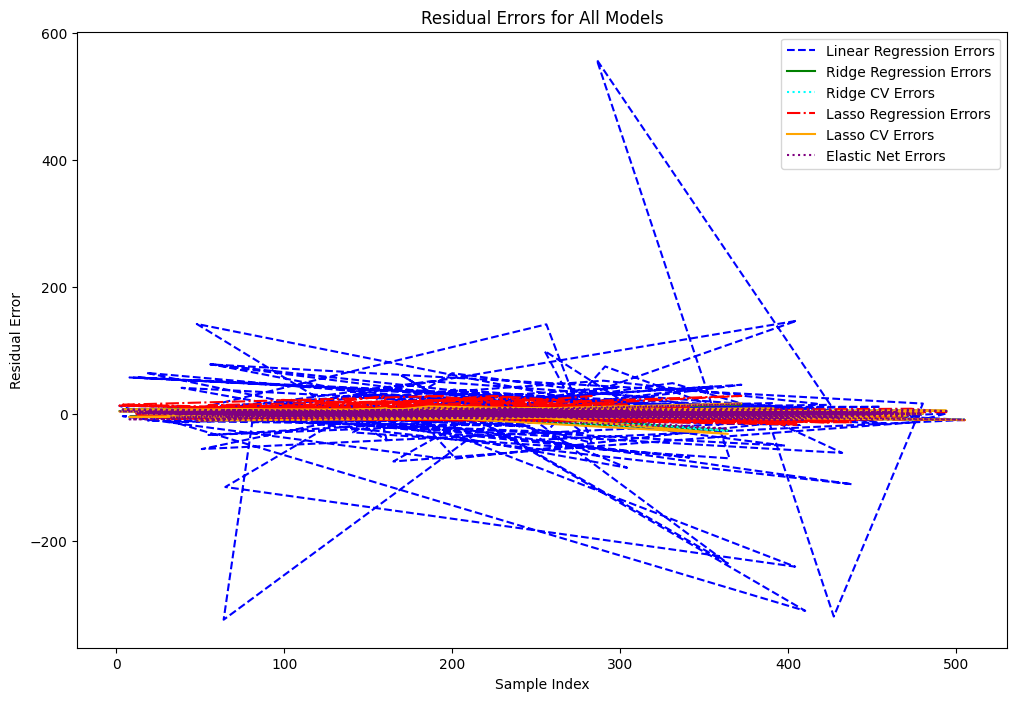

In [108]:
plt.figure(figsize=(12, 8))
plt.plot(y_test - y_pred, label='Linear Regression Errors', linestyle='--', color='blue')
plt.plot(y_test - y_pred_r, label='Ridge Regression Errors', linestyle='-', color='green')
plt.plot(y_test - y_pred_rcv, label='Ridge CV Errors', linestyle=':', color='cyan')
plt.plot(y_test - y_pred_lasso, label='Lasso Regression Errors', linestyle='-.', color='red')
plt.plot(y_test - y_pred_lasso_cv, label='Lasso CV Errors', linestyle='-', color='orange')
plt.plot(y_test - y_pred_e, label='Elastic Net Errors', linestyle=':', color='purple')
plt.xlabel('Sample Index')
plt.ylabel('Residual Error')
plt.title('Residual Errors for All Models')
plt.legend()
plt.show()

# Finished!